In [7]:
import keras 
import matplotlib.pyplot as plt 

In [8]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

In [11]:
print("X train ",x_train.shape)
print('X test ',x_test.shape)
print('Y train ',y_train.shape)
print('Y test ',y_test.shape)

X train  (50000, 32, 32, 3)
X test  (10000, 32, 32, 3)
Y train  (50000, 1)
Y test  (10000, 1)


Text(0.5, 1.0, "Image Of Class 'frog' ")

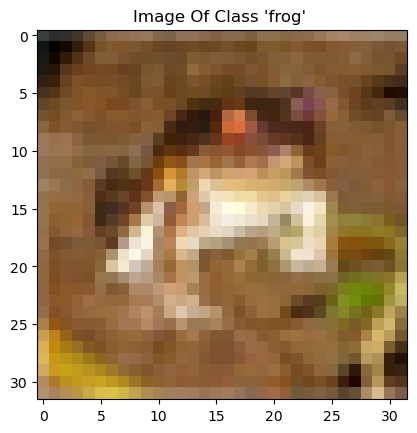

In [17]:
plt.imshow(x_train[0])
plt.title(f"Image Of Class '{class_labels[y_train[0]]}' ")

In [12]:
class_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'] 

In [19]:
# y_train = y_train.reshape(-1,)
# y_test = y_test.reshape(-1,)

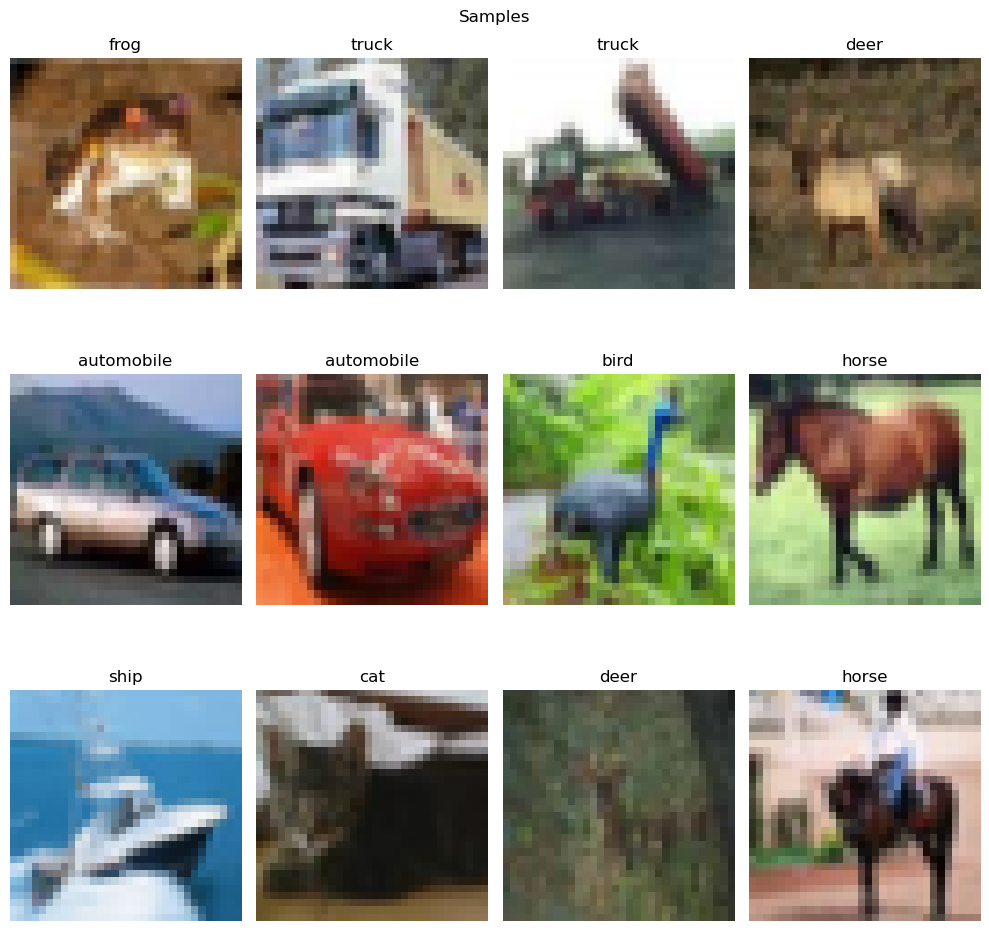

In [21]:
def show_samples(data, labels):
    fig, axes = plt.subplots(3, 4, figsize=(10, 10))

    axes = axes.flatten()

    for i in range(len(axes)):
        
        axes[i].imshow(data[i])
        
        class_index=labels[i]
        
        class_name=class_labels[class_index]
        axes[i].set_title(class_name)
        
        axes[i].axis('off')  
    
    
    plt.tight_layout()
    
    fig.suptitle("Samples")
    
    plt.show()

show_samples(x_train, y_train)

In [22]:
from sklearn.model_selection import train_test_split 
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,train_size=.5,random_state=0)

In [24]:
x_train = x_train / 255 
x_test = x_test / 255 
x_val = x_val / 255 

x_train[0].shape

(32, 32, 3)

In [33]:
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Input,Flatten
from keras.losses import SparseCategoricalCrossentropy
model = Sequential() 

model.add(Input(shape=x_train[0].shape))
model.add(Conv2D(filters=32 , kernel_size=(3,3) , activation='relu') )
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])





In [34]:
history = model.fit(x_train,y_train,epochs=20,batch_size=128,validation_data=(x_val,y_val))

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.1789 - loss: 2.1946 - val_accuracy: 0.2814 - val_loss: 1.9491
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.3146 - loss: 1.9049 - val_accuracy: 0.3640 - val_loss: 1.7623
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.3619 - loss: 1.7697 - val_accuracy: 0.3788 - val_loss: 1.7205
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.3959 - loss: 1.6914 - val_accuracy: 0.4454 - val_loss: 1.5798
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.4164 - loss: 1.6255 - val_accuracy: 0.4578 - val_loss: 1.5374
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.4354 - loss: 1.5694 - val_accuracy: 0.4744 - val_loss: 1.4705
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.4550 - loss: 1.5277 - val_accuracy: 0.4794 - val_loss: 1.4491
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.4580 - loss: 1.5013 - 

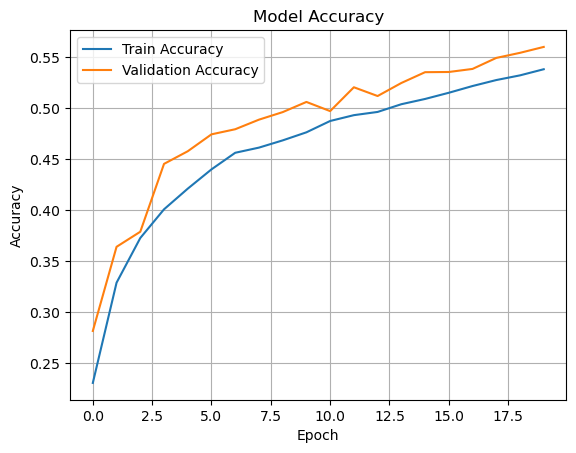

In [35]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
# !pip install scikeras

In [38]:
# from sklearn.model_selection import GridSearchCV

# from scikeras.wrappers import KerasClassifier

# import pandas as pd
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# def create_model(filters=32,
#                  kernel_size=(3, 3), 
#                  pool_size=(2, 2),
#                  activation='relu', 
#                  optimizer='adam',
#                  loss='sparse_categorical_crossentropy',
#                  dropout_rate=0.25,
#                  dense_units=512,
#                  dense_dropout_rate=0.5):
#     model = Sequential()
#     model.add(Input(shape=(32, 32, 3)))
#     model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation=activation))
#     model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation=activation))
#     model.add(MaxPooling2D(pool_size=pool_size))
#     model.add(Dropout(dropout_rate))
#     model.add(Conv2D(filters=2*filters, kernel_size=kernel_size, activation=activation))
#     model.add(Conv2D(filters=2*filters, kernel_size=kernel_size, activation=activation))
#     model.add(MaxPooling2D(pool_size=pool_size))
#     model.add(Dropout(dropout_rate))
#     model.add(Flatten())
#     model.add(Dense(units=dense_units, activation=activation))
#     model.add(Dropout(dense_dropout_rate))
#     model.add(Dense(10, activation='softmax'))
    
#     model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
#     return model


# model_class_keras = KerasClassifier(model=create_model, verbose=0)

# param_grid = {
#     'model__filters': [32, 64],
#     'model__kernel_size': [(3, 3),(4,4) ],
#     'model__pool_size': [(2, 2), (4,4)],
#     'model__activation': ['relu'],
#     'model__optimizer': ['adam'],
#     'model__loss': ['sparse_categorical_crossentropy'],
#     'model__dropout_rate': [0.2, 0.25],
#     'model__dense_units': [256, 512],
#     'model__dense_dropout_rate': [0.4, 0.5]
# }

# cv =5

# grid = GridSearchCV(estimator=model_class_keras, param_grid=param_grid, cv=cv, verbose=0)

# grid_result = grid.fit(x_train, y_train)

# results_df = pd.DataFrame(grid_result.cv_results_)

# results_df.to_csv('grid_search_results.csv', index=False)

In [39]:
# grid_result.best_params_

In [40]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential()

model.add(Input(shape=(32, 32, 3)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'  ))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu' ))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
263/391 ━━━━━━━━━━━━━━━━━━━━ 31s 242ms/step - accuracy: 0.1037 - loss: 2.3029

KeyboardInterrupt: 

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

print("Train Accuracy:", train_accuracy[-1])
print("Validation Accuracy:", val_accuracy[-1])

In [ ]:
model.save('cifar10_trained_model.keras')

In [ ]:
from keras.models import load_model

model = load_model('cifar10_trained_model.keras')